#Telecom Customer Churn Classifier

Customer churn is one of the major issues in Telecommunication sectors. Maintaining the present customers is more cost effiecient than having new ones. This dataset contains information about customers including their services, billing information and demographics. Our goal is to predict if the exisiting customers churn or not.


#Data Analysis and Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.compose

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Importing all the necessary modules required for this analysis.

##Defining Business Problem

The company wants to identify the customers which are more likely to churn. It can cost more for acquiring new ones than maintaining the exisiting customers. This model will also allow us to know more about the dissactisfaction of the services provided by the company.

Our goal is to develop a model to identify those customers who are more likely to churn with the existing data.

##Data Collection

In [2]:
df = pd.read_csv("/content/Telco_Cusomer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CustomerID – Unique ID for each customer.

Gender – Male or Female.

SeniorCitizen – 1 if senior, 0 if not.

Partner – Yes/No if customer has a partner.

Dependents – Yes/No if customer has dependents.

Tenure – Number of months with the company.

PhoneService – Yes/No if customer has phone service.

MultipleLines – Yes/No/No phone service for multiple lines.

InternetService – Type of internet (DSL, Fiber optic, None).

OnlineSecurity – Yes/No/No internet service.

OnlineBackup – Yes/No/No internet service.

DeviceProtection – Yes/No/No internet service.

TechSupport – Yes/No/No internet service.

StreamingTV – Yes/No/No internet service.

StreamingMovies – Yes/No/No internet service.

Contract – Month-to-month, One year, or Two year.

PaperlessBilling – Yes/No.

PaymentMethod – How the customer pays bills.

MonthlyCharges – Monthly billing amount.

TotalCharges – Total billed amount (numeric).

Churn – Target: Yes if customer left, No if stayed.

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

In [4]:
df_train.shape

(5282, 21)

##Data Exploration

###Data Types

In [5]:
df_train.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
df_train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


This data contains no explicit null values.

###Visualisation

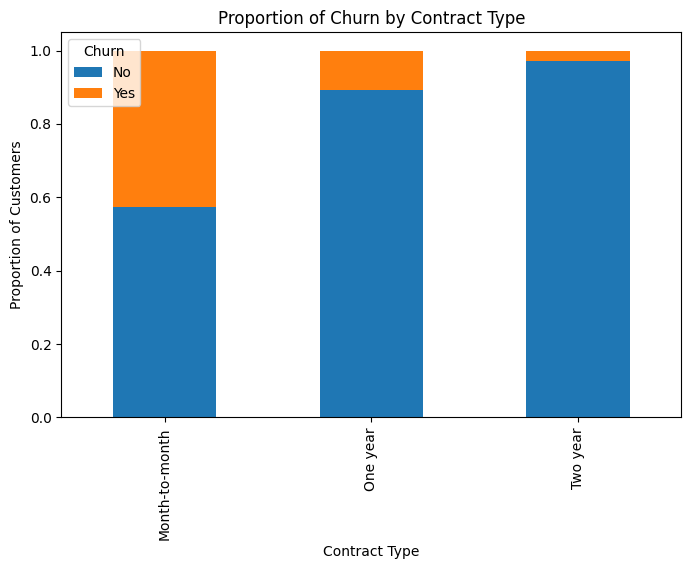

In [7]:
df_train['Churn'] = df_train['Churn']
df_train['Contract'] = df_train['Contract']

contract_churn = df_train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Proportion of Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

The above graph shows a trend of customers where customers having one year or two year contracts are more likely to stay with the company than that of monthly contract.

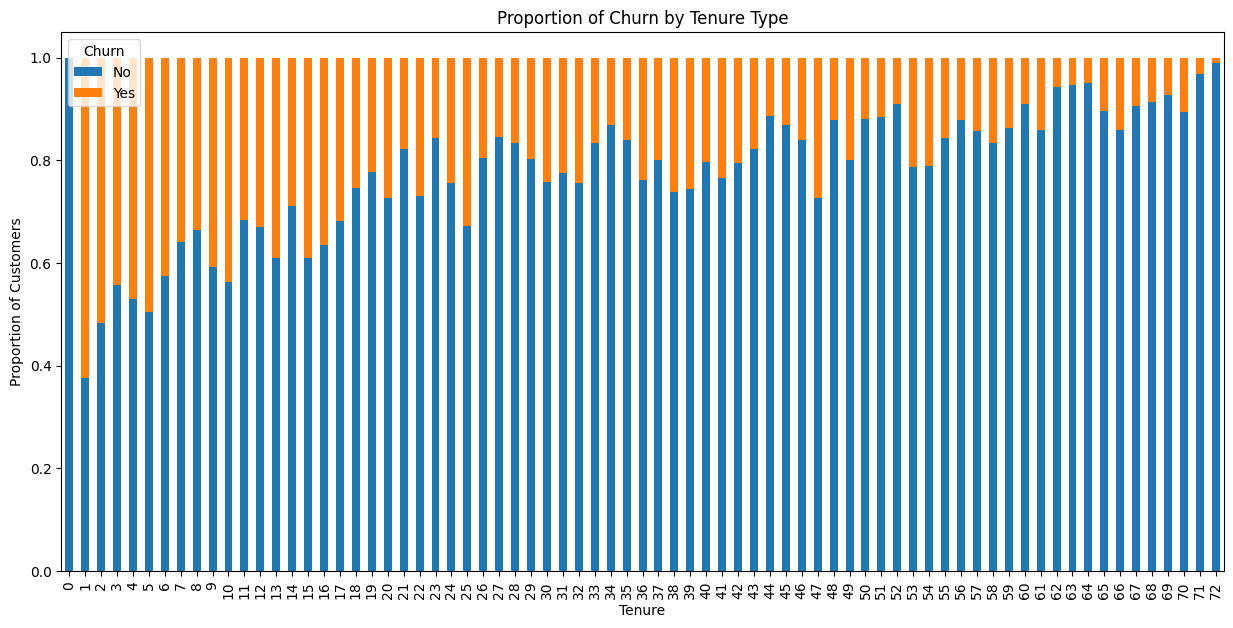

In [8]:
df_train['tenure'] = df_train['tenure']
contract_churn = df_train.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title("Proportion of Churn by Tenure Type")
plt.xlabel("Tenure")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

The chance of new customers is more likely for new customers than that of the old customers.

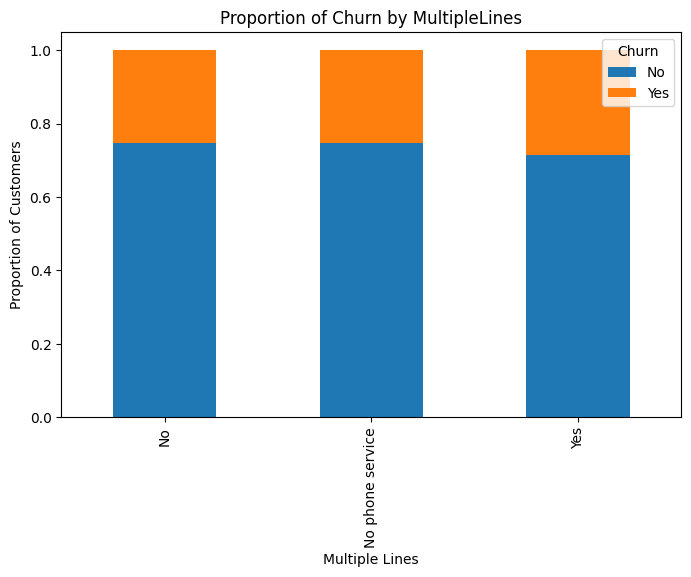

In [9]:
df_train['MultipleLines'] = df_train['MultipleLines']
contract_churn = df_train.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Proportion of Churn by MultipleLines")
plt.xlabel("Multiple Lines")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

<Axes: >

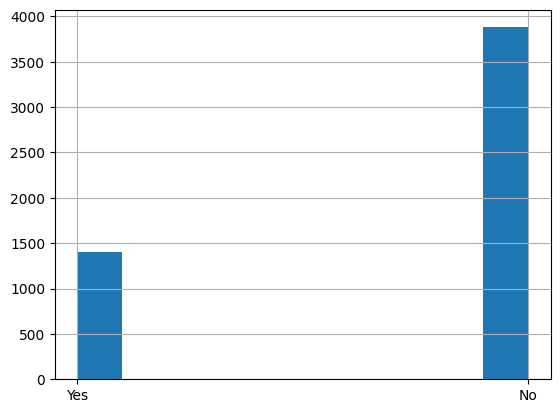

In [10]:
df_train['Churn'].hist()

The data is kind of imbalanced where more people are likely to stay.

##Data Preprocessing

In [11]:
df_train['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

df_train[binary_cols] = df_train[binary_cols].replace({"Yes": 1, "No": 0, "No phone service": 0, "No internet service": 0})
df_test[binary_cols] = df_test[binary_cols].replace({"Yes": 1, "No": 0,"No phone service": 0, "No internet service": 0})

/tmp/ipython-input-142717994.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[binary_cols] = df_train[binary_cols].replace({"Yes": 1, "No": 0, "No phone service": 0, "No internet service": 0})
/tmp/ipython-input-142717994.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[binary_cols] = df_test[binary_cols].replace({"Yes": 1, "No": 0,"No phone service": 0, "No internet service": 0})


Replacing all the Yes with 1 and No, No phone services and No internet services with 0 to reduce dimensionality when feature engineering.

In [13]:
df_train["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df_train['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [15]:
df_train['TotalCharges'].unique()

array(['78.45', '951.55', '818.45', ..., '170.9', '5680.9', '684.85'],
      dtype=object)

Here I found out that TotalCharges contained all String values. I converted them to numeric values usinf "pd.numeric()" funciton.

In [16]:
df_train["TotalCharges"] = pd.to_numeric(df_train["TotalCharges"], errors="coerce")
df_train["TotalCharges"].fillna(0, inplace=True)

df_test["TotalCharges"] = pd.to_numeric(df_test["TotalCharges"], errors="coerce")
df_test["TotalCharges"].fillna(0, inplace=True)

/tmp/ipython-input-3192235498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["TotalCharges"].fillna(0, inplace=True)
/tmp/ipython-input-3192235498.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
X_train = df_train.drop(["customerID", "Churn"], axis=1)
Y_train = df_train["Churn"]
X_test = df_test.drop(["customerID", "Churn"], axis=1)
Y_test = df_test["Churn"]

Splitting the df_train and test to target labels and parameters.

##Feature Engineering

In [18]:
categorical_attributes = X_train.select_dtypes(include = ["object"]).columns
numerical_attributes = X_train.select_dtypes(include = ["int64", "float64"]).columns


ct = sklearn.compose.ColumnTransformer(
    [
        ("one_hot_encoder", sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore"), categorical_attributes)
        ],
    remainder = "passthrough",
    )

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

ohe_features = ct.named_transformers_["one_hot_encoder"].get_feature_names_out(categorical_attributes)  # Getting one-hot feature names for plotting
all_features = np.concatenate([ohe_features, numerical_attributes]) # Combine with numerical columns

One hot encoding the categorical values and standardizing the numerical values for better performance.

In [19]:
X_train.shape

(5282, 41)

#Model

##Model Training

Training different Classification Models.

Here I would be training 5 different Models:

*   Logistic Regression
*   KNN Classifier
*   Random Forest Classifier
*   Decision Tree Classifier
*   Gradient Boosting Classifier





###Logistic Regression

In [20]:
logreg = LogisticRegression(max_iter=5000, solver='saga', penalty='l2')
logreg_params = {
    'C': [0.01, 0.1, 1, 10]  # Only 4 combinations
}
logreg_search = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
logreg_search.fit(X_train, Y_train)
print("LogReg Best Params:", logreg_search.best_params_)
print("Best Accuracy:", logreg_search.best_score_)

LogReg Best Params: {'C': 0.01}
Best Accuracy: 0.7851152848255498


###KNN Classifier

In [21]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
knn_search = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_search.fit(X_train, Y_train)
print("KNN Best Params:", knn_search.best_params_)
print("Best Accuracy:", knn_search.best_score_)

KNN Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7796296694475503


###Random Forest Classifier

In [22]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [50,100,150,200],
    'max_depth': [4,6,8,10],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]
}
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=15, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(X_train, Y_train)
print("RF Best Params:", rf_search.best_params_)
print("Best Accuracy:", rf_search.best_score_)


RF Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Best Accuracy: 0.8036737407184427


###Decision Tree Classifier

In [23]:
dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [4,6,8,10],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini','entropy']
}
dt_search = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_search.fit(X_train, Y_train)
print("DT Best Params:", dt_search.best_params_)
print("Best Accuracy:", dt_search.best_score_)

DT Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Accuracy: 0.7871984389782403


###Gradient Boosting Classifier

In [24]:
gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}
gb_search = RandomizedSearchCV(gb, gb_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gb_search.fit(X_train, Y_train)
print("GB Best Params:", gb_search.best_params_)
print("Best Accuracy:", gb_search.best_score_)

GB Best Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best Accuracy: 0.8023478039620425


From the above results, we can conclude that Gradient Boosting Classifier had the best accuracy of all.
So we will be testing the test dataset with best Gradient Boosting Classifier Model.

##Model Evaluation

In [25]:
best_gb = gb_search.best_estimator_
y_pred = best_gb.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  80.52243043725156


From the best Gradient Boosting Classifier, we got an accuracy of 80.74 percent.

In [26]:
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1189  105]
 [ 238  229]]


From the confusion matrix we got:
*   True Negatives (TN) = 1187
*   False Positives (FP) = 99
*   False Negatives (FN) = 240
*   True Positives (TP) = 235

This model is good at predicting non-churners rather than churners.











In [27]:
prec = precision_score(Y_test, y_pred)
print(f"Precision: {prec:.4f}")

# Recall
rec = recall_score(Y_test, y_pred)
print(f"Recall: {rec:.4f}")

# F1-score
f1 = f1_score(Y_test, y_pred)
print(f"F1-score: {f1:.4f}")

Precision: 0.6856
Recall: 0.4904
F1-score: 0.5718


Precision = 0.704, Of all customers the model predicted as churners, 70.4% actually churned.

Recall = 0.495, Of all actual churners, the model only caught ~49.5%. So model couldn't identify about half of churners.

F1-score = 0.581, From F1-score we can conclude that the model is moderate but can be improved in future research.

In [28]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.69      0.49      0.57       467

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.81      0.79      1761



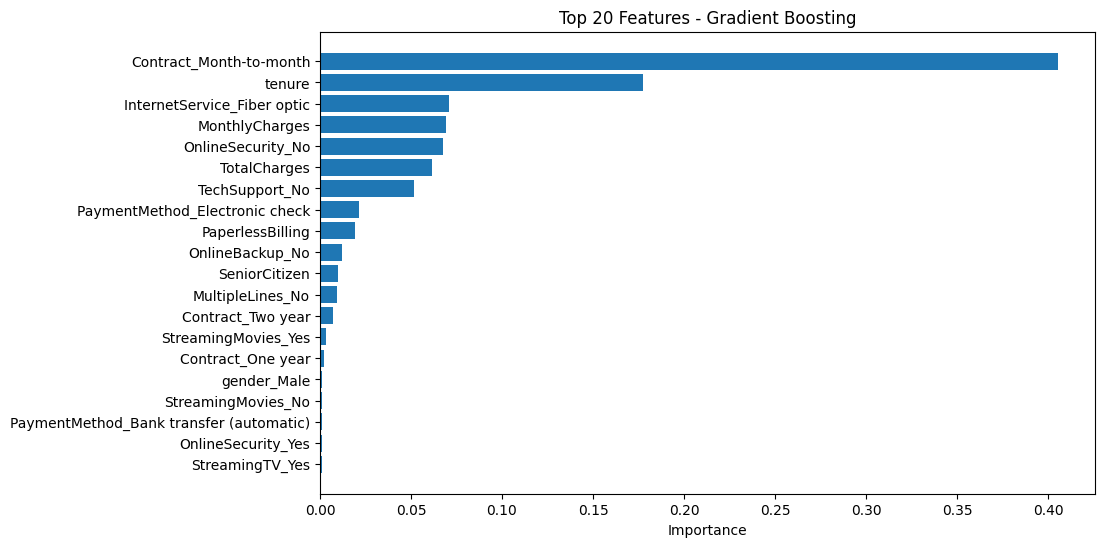

In [29]:
importances = best_gb.feature_importances_

# Creating a DataFrame for easier sorting
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plotting top 20 features
top_n = 20
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:top_n][::-1], feat_imp['Importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.title(f"Top {top_n} Features - Gradient Boosting")
plt.show()

Here are the most important features which plays a major role in predicting the customers who will churn.

As we saw in one of the graphs, Month_to_month contract plays a crucical role in this model.